In [1]:
#Importing necessary libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Reading dataset

df = pd.read_csv('Heart.csv')
df.head()

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


# Exploratory Data Analysis

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  303 non-null    int64  
 1   Age         303 non-null    int64  
 2   Sex         303 non-null    int64  
 3   ChestPain   303 non-null    object 
 4   RestBP      303 non-null    int64  
 5   Chol        303 non-null    int64  
 6   Fbs         303 non-null    int64  
 7   RestECG     303 non-null    int64  
 8   MaxHR       303 non-null    int64  
 9   ExAng       303 non-null    int64  
 10  Oldpeak     303 non-null    float64
 11  Slope       303 non-null    int64  
 12  Ca          299 non-null    float64
 13  Thal        301 non-null    object 
 14  AHD         303 non-null    object 
dtypes: float64(2), int64(10), object(3)
memory usage: 35.6+ KB


In [4]:
df.describe()

,Unnamed: 0,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000
mean,152.000000,54.438944,0.679868,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241
std,87.612784,9.038662,0.467299,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438
min,1.000000,29.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,76.500000,48.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,152.000000,56.000000,1.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,227.500000,61.000000,1.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000
max,303.000000,77.000000,1.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000


In [5]:
df['ChestPain'].unique()

array(['typical', 'asymptomatic', 'nonanginal', 'nontypical'],
      dtype=object)

In [6]:
df.groupby('ChestPain')['Sex'].value_counts().head()

ChestPain     Sex
asymptomatic  1      104
              0       40
nonanginal    1       51
              0       35
nontypical    1       32
Name: Sex, dtype: int64

In [7]:
df.groupby('ChestPain')['Sex'].value_counts()

ChestPain     Sex
asymptomatic  1      104
              0       40
nonanginal    1       51
              0       35
nontypical    1       32
              0       18
typical       1       19
              0        4
Name: Sex, dtype: int64

In [8]:
df['gender'] = df['Sex'].map({1:"male", 0:"female"})
df.head()

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD,gender
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No,male
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes,male
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes,male
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No,male
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No,female


In [9]:
df['gend'] = df['Sex'].apply(lambda x: "male" if x == 1 else "female")
df.head()

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD,gender,gend
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No,male,male
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes,male,male
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes,male,male
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No,male,male
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No,female,female


In [10]:
df.drop(['Unnamed: 0'], axis='columns', inplace=True)
df.head()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD,gender,gend
0,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No,male,male
1,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes,male,male
2,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes,male,male
3,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No,male,male
4,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No,female,female


In [11]:
df.drop(df[['gender', 'gend']], axis=1, inplace=True)
df.head()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


In [12]:
df.isna().count()

Age          303
Sex          303
ChestPain    303
RestBP       303
Chol         303
Fbs          303
RestECG      303
MaxHR        303
ExAng        303
Oldpeak      303
Slope        303
Ca           303
Thal         303
AHD          303
dtype: int64

In [13]:
df.isna().sum()

Age          0
Sex          0
ChestPain    0
RestBP       0
Chol         0
Fbs          0
RestECG      0
MaxHR        0
ExAng        0
Oldpeak      0
Slope        0
Ca           4
Thal         2
AHD          0
dtype: int64

In [14]:
df.isna().any()

Age          False
Sex          False
ChestPain    False
RestBP       False
Chol         False
Fbs          False
RestECG      False
MaxHR        False
ExAng        False
Oldpeak      False
Slope        False
Ca            True
Thal          True
AHD          False
dtype: bool

# Feature Engineering

In [15]:
df['Ca'].unique()

array([ 0.,  3.,  2.,  1., nan])

In [16]:
#Removing null values

df['Ca'] = df['Ca'].fillna(df['Ca'].median)
df

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,63,1,typical,145,233,1,2,150,0,2.3,3,0,fixed,No
1,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3,normal,Yes
2,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2,reversable,Yes
3,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0,normal,No
4,41,0,nontypical,130,204,0,2,172,0,1.4,1,0,normal,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,typical,110,264,0,0,132,0,1.2,2,0,reversable,Yes
299,68,1,asymptomatic,144,193,1,0,141,0,3.4,2,2,reversable,Yes
300,57,1,asymptomatic,130,131,0,0,115,1,1.2,2,1,reversable,Yes
301,57,0,nontypical,130,236,0,2,174,0,0.0,2,1,normal,Yes


In [17]:
df['AHD'].unique()

array(['No', 'Yes'], dtype=object)

In [18]:
#Converting Outcome to binary values

df['Outcome'] = df['AHD'].apply(lambda x: 1 if x =="Yes" else 0)
df.head()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD,Outcome
0,63,1,typical,145,233,1,2,150,0,2.3,3,0,fixed,No,0
1,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3,normal,Yes,1
2,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2,reversable,Yes,1
3,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0,normal,No,0
4,41,0,nontypical,130,204,0,2,172,0,1.4,1,0,normal,No,0


In [19]:
df['Pain'] = df['ChestPain'].map({"typical":0, "nontypical":1, "nonanginal": 2, "asymptomatic": 3})
df.head()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD,Outcome,Pain
0,63,1,typical,145,233,1,2,150,0,2.3,3,0,fixed,No,0,0
1,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3,normal,Yes,1,3
2,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2,reversable,Yes,1,3
3,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0,normal,No,0,2
4,41,0,nontypical,130,204,0,2,172,0,1.4,1,0,normal,No,0,1


In [20]:
df['RestECG'].unique()

array([2, 0, 1], dtype=int64)

In [21]:
df['Fbs'].unique()

array([1, 0], dtype=int64)

In [22]:
df.groupby('Pain')['Sex'].value_counts()

Pain  Sex
0     1       19
      0        4
1     1       32
      0       18
2     1       51
      0       35
3     1      104
      0       40
Name: Sex, dtype: int64

In [23]:
df.groupby('Outcome')['Sex'].value_counts()

Outcome  Sex
0        1       92
         0       72
1        1      114
         0       25
Name: Sex, dtype: int64

In [24]:
df['ExAng'].unique()

array([0, 1], dtype=int64)

In [25]:
df['Slope'].unique()

array([3, 2, 1], dtype=int64)

In [26]:
df['Thal'].describe()

count        301
unique         3
top       normal
freq         166
Name: Thal, dtype: object

In [27]:
df.isna().sum()

Age          0
Sex          0
ChestPain    0
RestBP       0
Chol         0
Fbs          0
RestECG      0
MaxHR        0
ExAng        0
Oldpeak      0
Slope        0
Ca           0
Thal         2
AHD          0
Outcome      0
Pain         0
dtype: int64

In [28]:
df['Thal'] = df['Thal'].fillna(df['Thal'].median)
df

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD,Outcome,Pain
0,63,1,typical,145,233,1,2,150,0,2.3,3,0,fixed,No,0,0
1,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3,normal,Yes,1,3
2,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2,reversable,Yes,1,3
3,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0,normal,No,0,2
4,41,0,nontypical,130,204,0,2,172,0,1.4,1,0,normal,No,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,typical,110,264,0,0,132,0,1.2,2,0,reversable,Yes,1,0
299,68,1,asymptomatic,144,193,1,0,141,0,3.4,2,2,reversable,Yes,1,3
300,57,1,asymptomatic,130,131,0,0,115,1,1.2,2,1,reversable,Yes,1,3
301,57,0,nontypical,130,236,0,2,174,0,0.0,2,1,normal,Yes,1,1


In [29]:
df.isna().sum()

Age          0
Sex          0
ChestPain    0
RestBP       0
Chol         0
Fbs          0
RestECG      0
MaxHR        0
ExAng        0
Oldpeak      0
Slope        0
Ca           0
Thal         0
AHD          0
Outcome      0
Pain         0
dtype: int64

In [30]:
df.groupby('ChestPain')['Sex'].value_counts()

ChestPain     Sex
asymptomatic  1      104
              0       40
nonanginal    1       51
              0       35
nontypical    1       32
              0       18
typical       1       19
              0        4
Name: Sex, dtype: int64

# Data Visualization

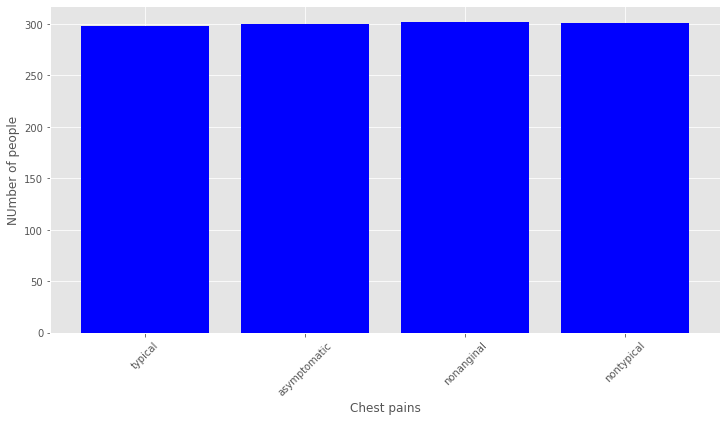

In [31]:
yx = np.arange(len(df))

plt.style.use('ggplot')
plt.figure(figsize=(12, 6))
plt.bar(df['ChestPain'], yx, color='blue')
plt.xticks(rotation=45)
plt.xlabel("Chest pains")
plt.ylabel("NUmber of people")

plt.show()

In [32]:
chest = df['ChestPain'].value_counts()
chest

asymptomatic    144
nonanginal       86
nontypical       50
typical          23
Name: ChestPain, dtype: int64

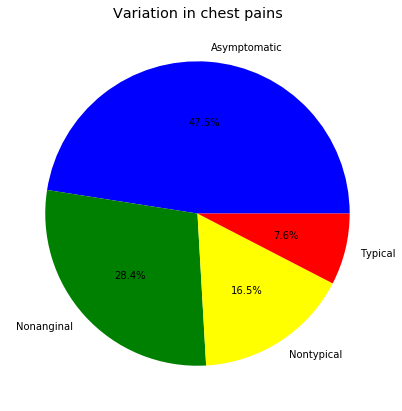

In [33]:
#Visually obtaining the total cases of chest pain

plt.figure(figsize=(12, 7))
color=('blue', 'green', 'yellow', 'red')
plt.pie(chest, data=df, labels=("Asymptomatic", "Nonanginal", "Nontypical", "Typical"), colors=color, autopct="%1.1f%%")

plt.title("Variation in chest pains", loc='center')
plt.show()

In [34]:
gender = df['Sex'].value_counts()
gender

1    206
0     97
Name: Sex, dtype: int64

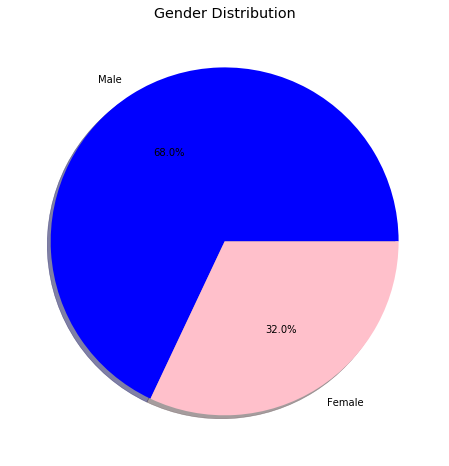

In [35]:
#Visually obtaining the gender distribution

plt.figure(figsize=(15, 8))

color = ("Blue", "Pink")
plt.pie(gender, data=df, colors=color, labels=("Male", "Female"),autopct="%1.1f%%", shadow=True)
plt.title("Gender Distribution")
plt.show()

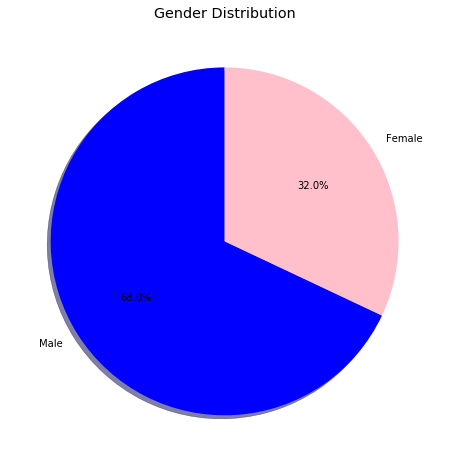

In [36]:
plt.figure(figsize=(15, 8))

color = ("Blue", "Pink")
plt.pie(gender, data=df, colors=color, labels=("Male", "Female"),autopct="%1.1f%%", startangle=90,shadow=True)
plt.title("Gender Distribution")
plt.show()


Text(0.5, 1.0, 'Gender distribution')

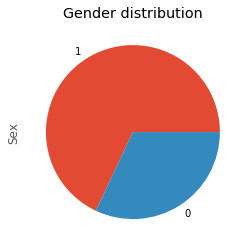

In [37]:
plt.figure(figsize=(15, 8))
df['Sex'].value_counts().plot(kind='pie').set_title("Gender distribution")

Text(0.5, 1.0, 'Gender distribution')

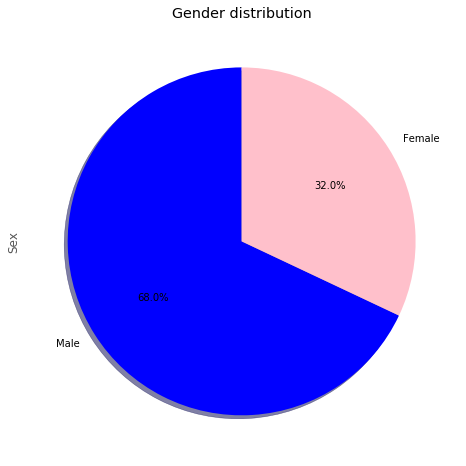

In [38]:
plt.figure(figsize=(15, 8))

color = ("Blue", "Pink")
df['Sex'].value_counts().plot(kind='pie', colors=color, labels=("Male", "Female"),autopct="%1.1f%%", startangle=90,shadow=True).set_title("Gender distribution")

# Model Building

In [39]:
#Importing dependencies

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, mean_squared_error, mean_absolute_error

In [40]:
df.drop(df[['ChestPain','Thal']], axis='columns', inplace=True)
df.head()

,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,AHD,Outcome,Pain
0,63,1,145,233,1,2,150,0,2.3,3,0,No,0,0
1,67,1,160,286,0,2,108,1,1.5,2,3,Yes,1,3
2,67,1,120,229,0,2,129,1,2.6,2,2,Yes,1,3
3,37,1,130,250,0,0,187,0,3.5,3,0,No,0,2
4,41,0,130,204,0,2,172,0,1.4,1,0,No,0,1


In [41]:
df =df[['Age', 'Sex','Pain', 'RestBP', 'Chol','Fbs','RestECG','MaxHR','ExAng','Oldpeak','Slope','Ca', 'Outcome']]
df.head()

,Age,Sex,Pain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Outcome
0,63,1,0,145,233,1,2,150,0,2.3,3,0,0
1,67,1,3,160,286,0,2,108,1,1.5,2,3,1
2,67,1,3,120,229,0,2,129,1,2.6,2,2,1
3,37,1,2,130,250,0,0,187,0,3.5,3,0,0
4,41,0,1,130,204,0,2,172,0,1.4,1,0,0


In [42]:
df['ExAng'].unique()

array([0, 1], dtype=int64)

In [44]:
df.to_csv('heart5.csv', index=False)

In [45]:
df = pd.read_csv("heart5.csv")
df.head()

,Age,Sex,Pain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Outcome
0,63,1,0,145,233,1,2,150,0,2.3,3,0,0
1,67,1,3,160,286,0,2,108,1,1.5,2,3,1
2,67,1,3,120,229,0,2,129,1,2.6,2,2,1
3,37,1,2,130,250,0,0,187,0,3.5,3,0,0
4,41,0,1,130,204,0,2,172,0,1.4,1,0,0


In [46]:
a = df.iloc[:, 0:12]
b = df.iloc[:, 12]

In [47]:
a.head()

,Age,Sex,Pain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca
0,63,1,0,145,233,1,2,150,0,2.3,3,0
1,67,1,3,160,286,0,2,108,1,1.5,2,3
2,67,1,3,120,229,0,2,129,1,2.6,2,2
3,37,1,2,130,250,0,0,187,0,3.5,3,0
4,41,0,1,130,204,0,2,172,0,1.4,1,0


In [48]:
b.head()

0    0
1    1
2    1
3    0
4    0
Name: Outcome, dtype: int64

In [49]:
a_train, a_test, b_train, b_test = train_test_split(a, b, test_size=0.3)

In [50]:
#Scaling the dataset

scaler = StandardScaler()
a_train = scaler.fit_transform(a_train)
a_test = scaler.transform(a_test)

In [51]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(a_train, b_train)
y_pred = lr.predict(a_test)
mse = mean_squared_error(b_test, y_pred)
mae = mean_absolute_error(b_test, y_pred)
accuracy = accuracy_score(b_test, y_pred)
print("Logisitic Regression: ")
print("Accuracy: ", accuracy)
print("Mean Squared Error: ", mse)
print("Mean Absolute Error: ", mae)

Logisitic Regression: 
Accuracy:  0.8571428571428571
Mean Squared Error:  0.14285714285714285
Mean Absolute Error:  0.14285714285714285


In [52]:
lr.score(a_test, b_test)

0.8571428571428571

In [53]:
lr.predict([[45,1,0, 145,233,1,2,150, 0, 2.3, 3, 0]])

array([1], dtype=int64)

In [54]:
from sklearn.tree import DecisionTreeClassifier
tr = DecisionTreeClassifier()
tr.fit(a_train, b_train)
y_pred = tr.predict(a_test)
mse = mean_squared_error(b_test, y_pred)
mae = mean_absolute_error(b_test, y_pred)
accuracy = accuracy_score(b_test, y_pred)
print("Decision Tree Classifier: ")
print("Accuracy: ", accuracy)
print("Mean Squared Error: ", mse)
print("Mean Absolute Error: ", mae)

Decision Tree Classifier: 
Accuracy:  0.6813186813186813
Mean Squared Error:  0.31868131868131866
Mean Absolute Error:  0.31868131868131866


In [55]:
from sklearn.linear_model import Perceptron
pr = Perceptron()
pr.fit(a_train, b_train)
y_pred = pr.predict(a_test)
mse = mean_squared_error(b_test, y_pred)
mae = mean_absolute_error(b_test, y_pred)
accuracy = accuracy_score(b_test, y_pred)
print("Perceptron: ")
print("Accuracy: ", accuracy)
print("Mean Squared Error: ", mse)
print("Mean Absolute Error: ", mae)

Perceptron: 
Accuracy:  0.7472527472527473
Mean Squared Error:  0.25274725274725274
Mean Absolute Error:  0.25274725274725274


In [56]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()
kn.fit(a_train, b_train)
y_pred = kn.predict(a_test)
mse = mean_squared_error(b_test, y_pred)
mae = mean_absolute_error(b_test, y_pred)
accuracy = accuracy_score(b_test, y_pred)
print("KNeighbors Classifier: ")
print("Accuracy: ", accuracy)
print("Mean Squared Error: ", mse)
print("Mean Absolute Error: ", mae)

KNeighbors Classifier: 
Accuracy:  0.7802197802197802
Mean Squared Error:  0.21978021978021978
Mean Absolute Error:  0.21978021978021978


In [57]:
from sklearn.svm import SVC
sv = SVC(kernel="linear")
sv.fit(a_train, b_train)
y_pred = sv.predict(a_test)
mse = mean_squared_error(b_test, y_pred)
mae = mean_absolute_error(b_test, y_pred)
accuracy = accuracy_score(b_test, y_pred)
print("Support Vector Machine: ")
print("Accuracy: ", accuracy)
print("Mean Squared Error: ", mse)
print("Mean Absolute Error: ", mae)

Support Vector Machine: 
Accuracy:  0.8351648351648352
Mean Squared Error:  0.16483516483516483
Mean Absolute Error:  0.16483516483516483


In [58]:
from sklearn.svm import SVC
pv = SVC(kernel="poly")
pv.fit(a_train, b_train)
y_pred = pv.predict(a_test)
mse = mean_squared_error(b_test, y_pred)
mae = mean_absolute_error(b_test, y_pred)
accuracy = accuracy_score(b_test, y_pred)
print("Support Vector Machine (Polynomial): ")
print("Accuracy: ", accuracy)
print("Mean Squared Error: ", mse)
print("Mean Absolute Error: ", mae)

Support Vector Machine (Polynomial): 
Accuracy:  0.7362637362637363
Mean Squared Error:  0.26373626373626374
Mean Absolute Error:  0.26373626373626374


In [59]:
from sklearn.naive_bayes import GaussianNB
gb = GaussianNB()
gb.fit(a_train, b_train)
y_pred = gb.predict(a_test)
mse = mean_squared_error(b_test, y_pred)
mae = mean_absolute_error(b_test, y_pred)
accuracy = accuracy_score(b_test, y_pred)
print("Naive Bayes (Gaussian): ")
print("Accuracy: ", accuracy)
print("Mean Squared Error: ", mse)
print("Mean Absolute Error: ", mae)

Naive Bayes (Gaussian): 
Accuracy:  0.7692307692307693
Mean Squared Error:  0.23076923076923078
Mean Absolute Error:  0.23076923076923078


In [61]:
gb.predict([[45, 1, 0, 145,233,1,2,150, 0, 2.3, 3, 0]])

array([1], dtype=int64)

In [62]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(a_train, b_train)
y_pred = rf.predict(a_test)
mse = mean_squared_error(b_test, y_pred)
mae = mean_absolute_error(b_test, y_pred)
accuracy = accuracy_score(b_test, y_pred)
print("Random Forest Classifier: ")
print("Accuracy: ", accuracy)
print("Mean Squared Error: ", mse)
print("Mean Absolute Error: ", mae)

Random Forest Classifier: 
Accuracy:  0.8021978021978022
Mean Squared Error:  0.1978021978021978
Mean Absolute Error:  0.1978021978021978


In [63]:
import pickle

In [64]:
pickle.dump(gb, open('heart.pkl', 'wb'))